In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df = df.drop('Unnamed: 0',axis=1)

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
x = df.drop('sales',axis=1)
y = df['sales']

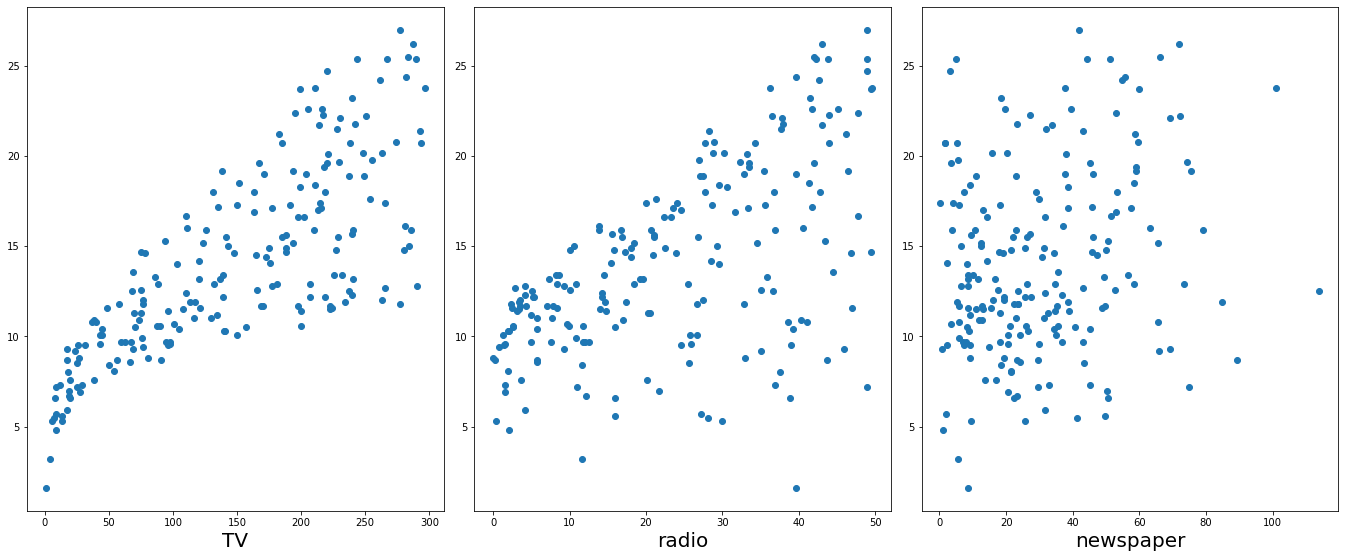

In [11]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 4:
        ax = plt.subplot(2,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

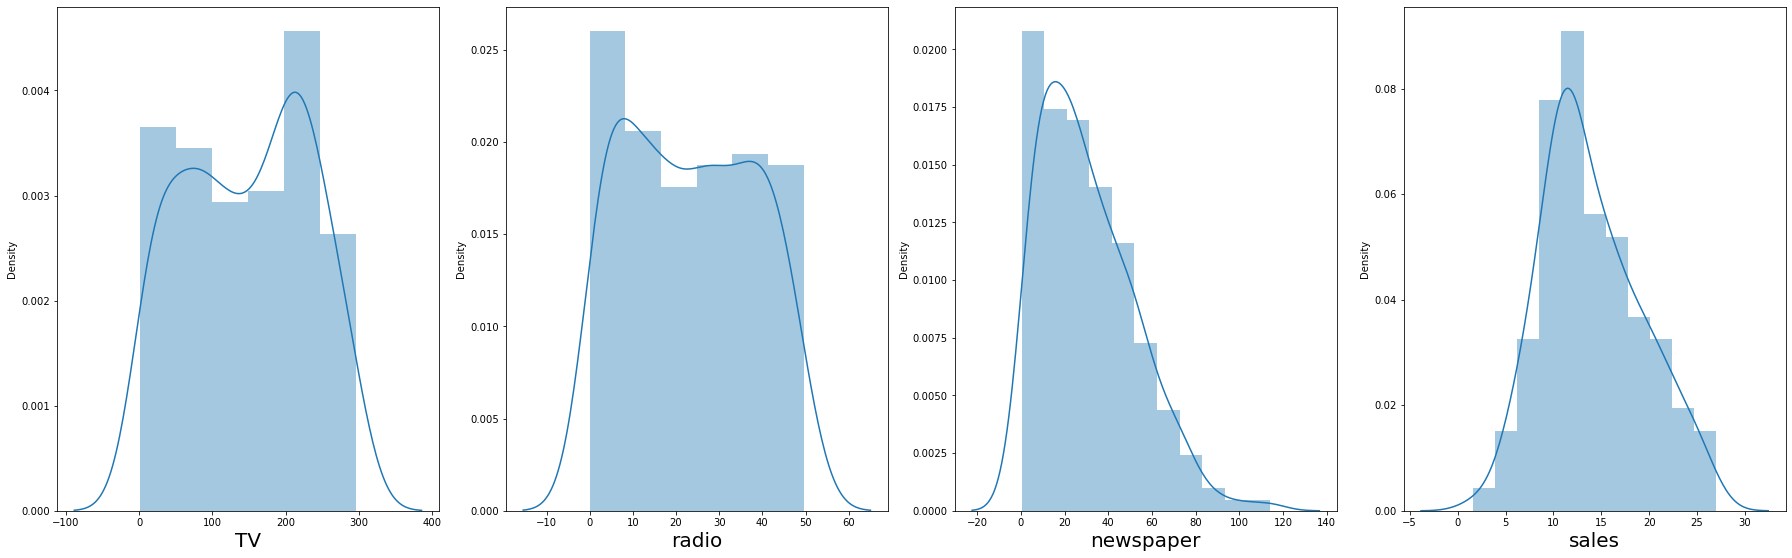

In [12]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in df:
    if plotno <= 4:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [13]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
df.drop('sales',axis=1).corrwith(df.sales)

TV           0.782224
radio        0.576223
newspaper    0.228299
dtype: float64

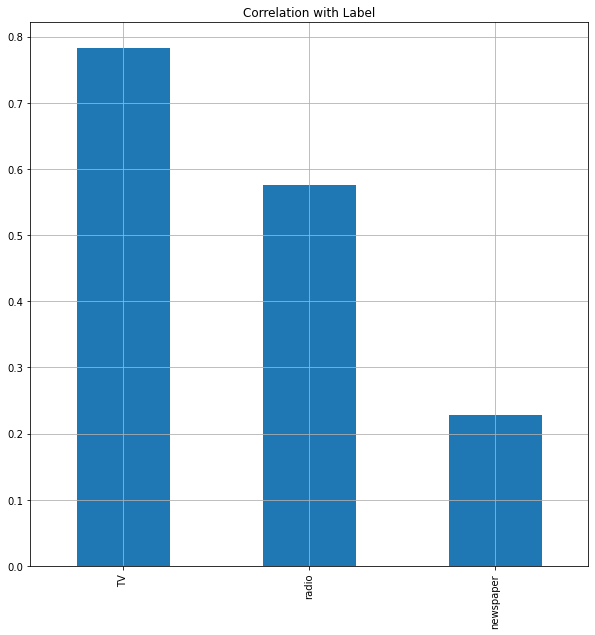

In [15]:
df.drop('sales',axis=1).corrwith(df.sales).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

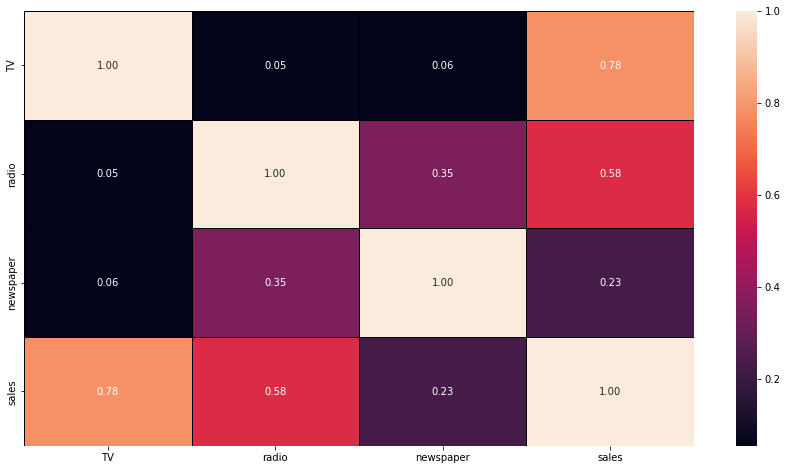

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

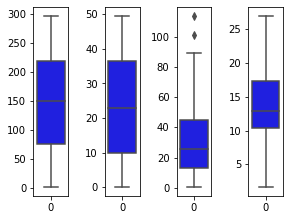

In [17]:
a = df.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = df[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [18]:
print('newspaper Highest allowed',df['newspaper'].mean()+3*df['newspaper'].std())
print('newspaper Lowest allowed',df['newspaper'].mean()-3*df['newspaper'].std())
print('\n')

newspaper Highest allowed 95.8898625155685
newspaper Lowest allowed -34.7818625155685




In [20]:
df1=df[(df['newspaper']<95.89)]

In [21]:
df1.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


In [22]:
x = df1.drop('sales',axis=1)
y = df1['sales']

In [23]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

# LinearRegression

In [24]:
reg= LinearRegression()

In [25]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.8810539797064412
At Random state 0 the testing accuracy is :- 0.9169198405610238


At Random state 1 the training accuracy is :- 0.8914052092368193
At Random state 1 the testing accuracy is :- 0.9015908192580149


At Random state 2 the training accuracy is :- 0.914062166521022
At Random state 2 the testing accuracy is :- 0.8428698015955045


At Random state 3 the training accuracy is :- 0.885841774992629
At Random state 3 the testing accuracy is :- 0.9149570033494691


At Random state 4 the training accuracy is :- 0.9005093374961071
At Random state 4 the testing accuracy is :- 0.8621726482172964


At Random state 5 the training accuracy is :- 0.9002368728891074
At Random state 5 the testing accuracy is :- 0.8657156665982401


At Random state 6 the training accuracy is :- 0.8940891865124617
At Random state 6 the testing accuracy is :- 0.8929377262182756


At Random state 7 the training accuracy is :- 0.8913212594482884
At Random state 7 th

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 1)

In [27]:
reg.score(x_train, y_train)

0.8902741633439696

In [28]:
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.9090407065584054

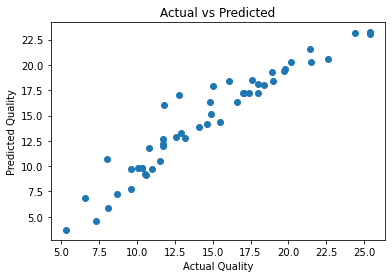

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [30]:
print ('r2_score',r2_score (y_test,y_pred))
print ('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error',mean_squared_error (y_test,y_pred))

r2_score 0.9090407065584054
mean_absolute_error 1.0862886571717405
mean_squared_error 2.2376892141194955


In [31]:
Lassocv = LassoCV(alphas = None, max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.9020076689249494

In [32]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
rdgcv.fit(x_train, y_train)
rd_model = Ridge(alpha=rdgcv.alpha_)
rd_model.fit(x_train, y_train)
rd_model.score(x_test, y_test)

0.9015922342626412

# DecisionTreeRegressor

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
dtr.score(x_train,y_train)

1.0

In [36]:
y_pred = dtr.predict(x_test)
dtr.score(x_test, y_test)

0.9568879243750944

In [37]:
metrics.r2_score(y_test, y_pred)

0.9568879243750944

# AdaBoostRegressor

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 1)

In [39]:
ada = AdaBoostRegressor()

In [40]:
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [41]:
x_pred = ada.predict(x_train) 

In [42]:
accuracy = metrics.r2_score(y_train, x_pred)
accuracy

0.975975225506956

In [43]:
y_pred = ada.predict(x_test) 
ada.score(x_test, y_test)

0.9541396653586292

In [44]:
metrics.r2_score(y_test, y_pred)

0.9541396653586292

# GradientBoostingRegressor

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 1)

In [46]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

GradientBoostingRegressor()

In [47]:
x_pred = gbdt.predict(x_train) 

In [48]:
accuracy = metrics.r2_score(y_train, x_pred)
accuracy

0.9986231381153071

In [49]:
y_pred = gbdt.predict(x_test) 
gbdt.score(x_test, y_test)

0.9872711057437938

In [50]:
metrics.r2_score(y_test, y_pred)

0.9872711057437938

# RandomForestRegressor

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 1)

In [52]:
rand = RandomForestRegressor()
rand.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
y_pred=rand.predict(x_test)

In [54]:
rand.score(x_test, y_test)

0.9849622877057499

In [55]:
metrics.r2_score(y_test, y_pred)

0.9849622877057499

In [56]:
x_pred = rand.predict(x_train) 

In [57]:
accuracy = metrics.r2_score(y_train, x_pred)
accuracy

0.996520028361906

# Findings

- LinearRegression train accuracy score 89.02% and test accuracy score 90.90%
- DecisionTreeRegressor train accuracy score 100% and test accuracy score 95.69%
- AdaBoostRegressor train accuracy score 97.6% and test accuracy score 95.41%
- GradientBoostingRegressor train accuracy score 99.86% and test accuracy score 98.73%
- RandomForestRegressor train accuracy score 99.65% and test accuracy score 98.5%

### Selecting GradientBoostingRegressor since the Accuracy score and test scores are greater and clsoe to each other.

In [58]:
file = 'Advertising_Sales_Channel.pickle'
pickle.dump(gbdt, open(file, 'wb'))